# Student Loan Risk with Deep Learning

In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [ ]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [ ]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [ ]:
# Define the target set using the credit_ranking column
y = loans_df['credit_ranking']

# Display a sample of y
print(y.head())



0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64


In [ ]:
# Define the features set X by selecting all columns but credit_ranking
X = loans_df.drop('credit_ranking', axis=1)

# Review the features DataFrame
print(X.head())



   payment_history  location_parameter  stem_degree_score  gpa_ranking  \
0              7.4                0.70               0.00          1.9   
1              7.8                0.88               0.00          2.6   
2              7.8                0.76               0.04          2.3   
3             11.2                0.28               0.56          1.9   
4              7.4                0.70               0.00          1.9   

   alumni_success  study_major_code  time_to_completion  \
0           0.076              11.0                34.0   
1           0.098              25.0                67.0   
2           0.092              15.0                54.0   
3           0.075              17.0                60.0   
4           0.076              11.0                34.0   

   finance_workshop_score  cohort_ranking  total_loan_score  \
0                  0.9978            3.51              0.56   
1                  0.9968            3.20              0.68   
2          

### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the resulting datasets to confirm the split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (1279, 11)
Testing features shape: (320, 11)
Training labels shape: (1279,)
Testing labels shape: (320,)


### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Optionally, transform the testing data (should be done when you're ready to use the test data)
X_test_scaled = scaler.transform(X_test)

# Display the first few entries of the scaled training features to verify
print(X_train_scaled[:5])



[[-0.73307913  0.6648928  -1.25704443 -0.3204585  -0.45362151 -0.74240736
  -0.6455073   0.24000129  0.98846046  0.0630946  -0.87223395]
 [ 1.06774091 -0.62346154  1.52314768  0.60886277 -0.36954631 -1.12518952
  -1.11200285  0.18789883 -1.7535127  -0.17390392 -0.77978452]
 [-1.74604041 -1.07158479 -1.35814232 -0.53491726 -0.78992229  1.07580793
   0.53628144 -2.67773653  2.32756363  0.77409018  3.28799021]
 [-0.62052788  0.49684658 -1.05484864 -0.0345135  -0.20139592  0.11885252
   1.18937522  0.37546769  1.24352773 -0.76640023 -0.6873351 ]
 [-0.50797663  0.60887739 -1.00429969 -0.53491726  0.26101766 -0.74240736
  -0.7077067  -0.33312578 -0.09557544 -0.47015208 -0.77978452]]


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [ ]:
# Define the number of inputs (features) to the model
number_of_features = X_train_scaled.shape[1]

# Print the number of features
print("Number of features:", number_of_features)



Number of features: 11


In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_of_features + 1) // 2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = hidden_nodes_layer1 // 2

#  Define the number of neurons in the output layer
print("Number of neurons in first layer:", hidden_nodes_layer1)
print("Number of neurons in second layer:", hidden_nodes_layer2)

# Define the number of neurons in the output layer for binary classification
output_neurons = 1  # This should be defined here



Number of neurons in first layer: 6
Number of neurons in second layer: 3


In [ ]:
# Create the Sequential model instance
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=hidden_nodes_layer1, activation='relu', input_shape=(number_of_features,)))

# Add the second hidden layer
model.add(Dense(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer
model.add(Dense(units=output_neurons, activation='sigmoid'))



In [ ]:
# Display the Sequential model summary
# Print the model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 72        
                                                                 
 dense_12 (Dense)            (None, 3)                 21        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
model.compile(
    optimizer='adam',             # Optimizer
    loss='binary_crossentropy',   # Loss function for binary classification
    metrics=['accuracy']          # List of metrics to evaluate during training and testing
)


In [227]:
# Fit the model using 50 epochs and the training data
history = model.fit(
    X_train_scaled,  # Scaled training features
    y_train,         # Training labels
    epochs=50,       # Number of epochs to train the model
    validation_split=0.2  # Optionally, reserve 20% of the training data for validation
)


Epoch 1/50
32/32 [==============================] - 4s 57ms/step - loss: 0.6904 - accuracy: 0.5455 - val_loss: 0.6890 - val_accuracy: 0.5820
Epoch 2/50
32/32 [==============================] - 1s 26ms/step - loss: 0.6876 - accuracy: 0.5836 - val_loss: 0.6864 - val_accuracy: 0.5977
Epoch 3/50
32/32 [==============================] - 1s 37ms/step - loss: 0.6846 - accuracy: 0.6090 - val_loss: 0.6835 - val_accuracy: 0.6211
Epoch 4/50
32/32 [==============================] - 1s 45ms/step - loss: 0.6815 - accuracy: 0.6178 - val_loss: 0.6804 - val_accuracy: 0.6211
Epoch 5/50
32/32 [==============================] - 2s 46ms/step - loss: 0.6782 - accuracy: 0.6178 - val_loss: 0.6770 - val_accuracy: 0.6289
Epoch 6/50
32/32 [==============================] - 1s 26ms/step - loss: 0.6747 - accuracy: 0.6256 - val_loss: 0.6735 - val_accuracy: 0.6445
Epoch 7/50
32/32 [==============================] - 2s 58ms/step - loss: 0.6709 - accuracy: 0.6344 - val_loss: 0.6699 - val_accuracy: 0.6523
Epoch 8/50
32

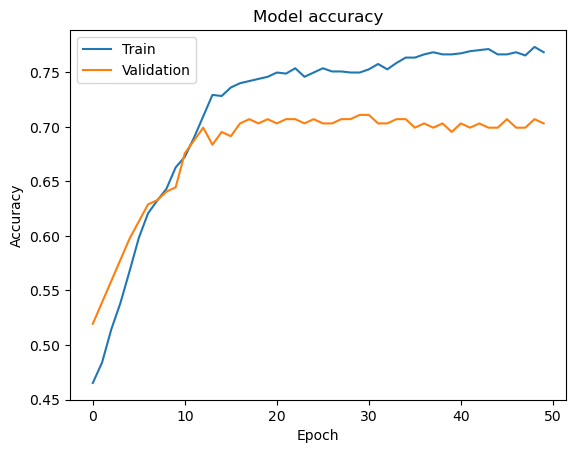

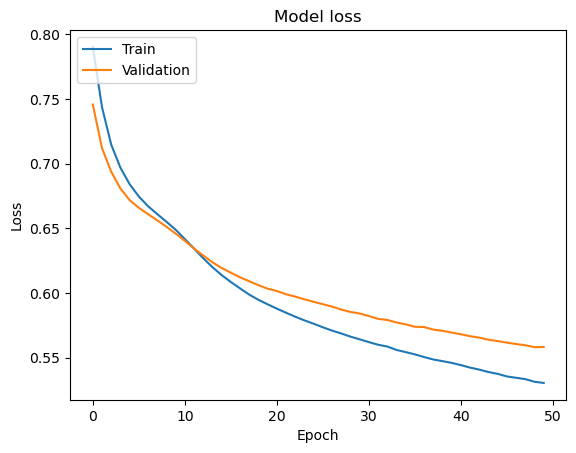

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Display the model loss and accuracy results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 0s 7ms/step - loss: 0.5467 - accuracy: 0.7156
Test Loss: 0.5467046499252319
Test Accuracy: 0.715624988079071


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [ ]:
# Set the model's file path
model_file_path = 'student_loans_model.keras'

# Export your model to a keras file
model.save(model_file_path)
print("Model has been saved to:", model_file_path)



Model has been saved to: student_loans_model.keras


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [ ]:
from tensorflow.keras.models import load_model

# Set the model's file path
model_file_path = 'student_loans_model.keras'


# Load the model to a new object
loaded_model = load_model(model_file_path)

print("Model loaded successfully from:", model_file_path)

loaded_model.summary()




Model loaded successfully from: student_loans_model.keras
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 72        
                                                                 
 dense_9 (Dense)             (None, 3)                 21        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [ ]:
# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)

# Display a sample of the predictions
print("Sample of predictions:", predictions[:5])



10/10 [==============================] - 1s 22ms/step
Sample of predictions: [[0.5653056 ]
 [0.38960978]
 [0.71133256]
 [0.71133256]
 [0.71133256]]


In [ ]:
# Save the predictions to a DataFrame and round the predictions to binary results

# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)

# Convert probabilities to binary predictions by rounding
binary_predictions = (predictions > 0.5).astype(int)

# Save the binary predictions to a DataFrame
predictions_df = pd.DataFrame(binary_predictions, columns=['Predicted Credit Ranking'])

# Display a sample of the DataFrame
print(predictions_df.head())

10/10 [==============================] - 0s 14ms/step
   Predicted Credit Ranking
0                         1
1                         0
2                         1
3                         1
4                         1


### Step 4: Display a classification report with the y test data and predictions

In [ ]:
# Print the classification report with the y test data and predictions

# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)

# Convert probabilities to binary predictions by rounding
binary_predictions = (predictions > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print(report)


10/10 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       154
           1       0.72      0.75      0.73       166

    accuracy                           0.72       320
   macro avg       0.72      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

To build a recommendation system for student loans, collect data on student finances, academic background, specific loan details, and historical repayment. This allows for personalized and viable loan recommendations.


2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

Based on the data collected, the recommendation system would use content-based filtering. This approach matches loan options to individual students by leveraging detailed attributes of their financial and academic profiles, ensuring personalized and relevant recommendations.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

Two real-world challenges in building a student loan recommendation system:

A. Privacy and Data Security: Handling sensitive financial and personal data requires robust security measures to protect against breaches and maintain user trust.

B. Bias and Fairness: Ensuring the system provides fair recommendations to all students, avoiding bias that could disadvantage certain groups.


**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

